Importing Libraries

In [353]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

Data Collection

In [354]:
Market_Data=pd.read_csv('Market_Data.csv')
Market_Data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Data Preparation

In [355]:
Market_Data.shape

(8523, 12)

In [356]:
Market_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [357]:
Market_Data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [358]:
Market_Data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [359]:
print(Market_Data[Market_Data['Outlet_Size'].isnull()].sort_values(by='Outlet_Location_Type').to_string())

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales
4179           FDB08        6.055          Low Fat         0.031279  Fruits and Vegetables  160.3578            OUT017                       2007         NaN               Tier 2  Supermarket Type1          2406.8670
5308           DRD12        6.960          Low Fat         0.077350            Soft Drinks   91.4146            OUT045                       2002         NaN               Tier 2  Supermarket Type1           638.5022
5298           NCP05       19.600          Low Fat         0.025430     Health and Hygiene  151.7024            OUT017                       2007         NaN               Tier 2  Supermarket Type1          2884.2456
5280           FDC50       15.850          Low Fat         0.136775                 Canned   94.4094            OUT045              

In [360]:
Market_Data[['Outlet_Location_Type','Outlet_Type']].where(Market_Data['Outlet_Size'].isnull()).value_counts()

Outlet_Location_Type  Outlet_Type      
Tier 2                Supermarket Type1    1855
Tier 3                Grocery Store         555
Name: count, dtype: int64

In [361]:
Market_Data['Outlet_Location_Type'].where(Market_Data['Outlet_Type']=='Supermarket Type1').value_counts()

Outlet_Location_Type
Tier 2    2785
Tier 1    1860
Tier 3     932
Name: count, dtype: int64

In [362]:
Market_Data['Outlet_Type'].where(Market_Data['Outlet_Location_Type']=='Tier 2').value_counts()

Outlet_Type
Supermarket Type1    2785
Name: count, dtype: int64

In [363]:
(Market_Data['Outlet_Size'].where((Market_Data['Outlet_Location_Type']=='Tier 2') & (Market_Data['Outlet_Type']=='Supermarket Type1'))).value_counts()

Outlet_Size
Small    930
Name: count, dtype: int64

In [364]:
Market_Data['Outlet_Location_Type'].where(Market_Data['Outlet_Type']=='Grocery Store').value_counts()

Outlet_Location_Type
Tier 3    555
Tier 1    528
Name: count, dtype: int64

In [365]:
(Market_Data['Outlet_Size'].where((Market_Data['Outlet_Location_Type']=='Tier 1') & (Market_Data['Outlet_Type']=='Grocery Store'))).value_counts()

Outlet_Size
Small    528
Name: count, dtype: int64

In [366]:
Market_Data['Outlet_Size'].fillna('Small',inplace=True)
Market_Data['Item_Weight'].fillna(Market_Data['Item_Weight'].mean(),inplace=True)

In [367]:
Market_Data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [368]:
Market_Data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [369]:
Market_Data['Outlet_Size'].value_counts()

Outlet_Size
Small     4798
Medium    2793
High       932
Name: count, dtype: int64

In [370]:
Market_Data.replace({
    'Item_Fat_Content':{'low fat':'Low Fat','reg':'Regular','LF':'Low Fat'},
    'Outlet_Size':{'High':0,'Medium':1,'Small':2},
    'Outlet_Location_Type':{'Tier 1':0,'Tier 2':1,'Tier 3':2},
    'Outlet_Type':{'Grocery Store':0,'Supermarket Type1':1,'Supermarket Type2':2,'Supermarket Type3':3}         
                     },inplace=True)

In [371]:
Market_Data.replace({'Item_Fat_Content':{'Low Fat':0,'Regular':1}},inplace=True)

In [372]:
Market_Data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,2,2,0,732.3800
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,1,994.7052


In [374]:
encoder=LabelEncoder()

Market_Data['Item_Identifier']=encoder.fit_transform(Market_Data['Item_Identifier'])
Market_Data['Item_Type']=encoder.fit_transform(Market_Data['Item_Type'])
Market_Data['Outlet_Identifier']=encoder.fit_transform(Market_Data['Outlet_Identifier'])

In [376]:
Market_Data.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857645,0.352693,0.066132,7.226681,140.992782,4.722281,1997.831867,1.453596,1.112871,1.201220,2181.288914
std,449.222377,4.226124,0.477836,0.051598,4.209990,62.275067,2.837201,8.371760,0.683084,0.812757,0.796459,1706.499616
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,9.310000,0.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,783.000000,12.857645,0.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,2.000000,1.000000,1.000000,1794.331000
75%,1167.000000,16.000000,1.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,1558.000000,21.350000,1.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,13086.964800


<Axes: >

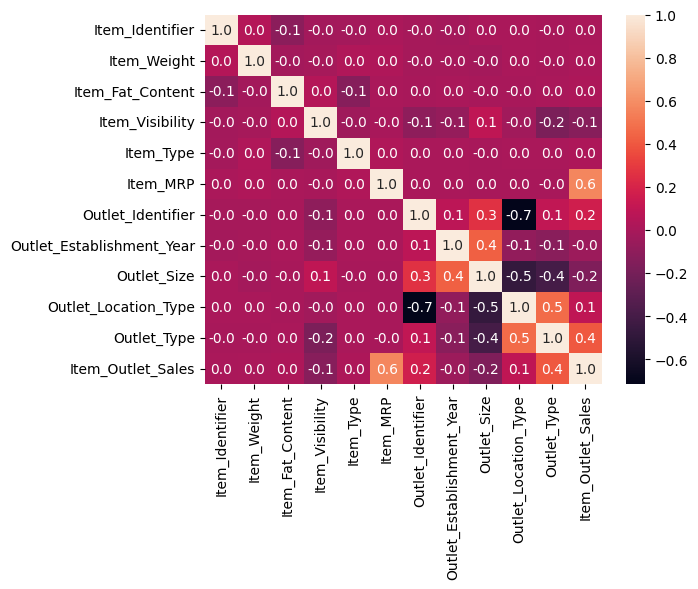

In [379]:
corr=Market_Data.corr()
sns.heatmap(data=corr,annot=True,fmt='0.1f')